17

Text(0.5, 1.0, 'Change in Weight')

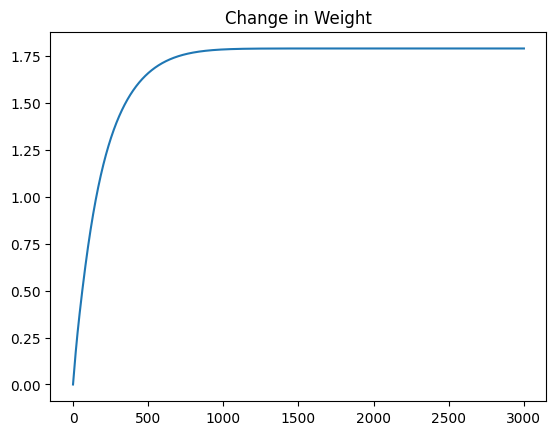

In [ ]:
"""# Adam Gradient Descent"""

import numpy as np
from sklearn.metrics import r2_score

def perceptron(x, w, b):
    yin = x * w + b
    ynet = sigmoid(yin)
    return ynet

def sigmoid(yin):
    return 1 / (1 + np.exp(-yin))

def grad_w(w, b, x, y, alpha):
    yhat = perceptron(x, w, b)
    dw = alpha * (y - yhat) * yhat * (1 - yhat) * x
    return dw

def grad_b(w, b, x, y, alpha):
    yhat = perceptron(x, w, b)
    db = alpha * (y - yhat) * yhat * (1 - yhat)
    return db

def adam_gradient_descent(X, Y, w, b, epochs, alpha, beta1, beta2, eps):
    wlist, blist, losslist, accuracylist = [w], [b], [], []
    mw, mb, vw, vb = 0, 0, 0, 0

    for i in range(1, epochs + 1):
        dw, db, total_loss = 0, 0, 0
        yhat_list=[]

        for x, y in zip(X, Y):
            yhat = perceptron(x, w, b)
            loss = y - yhat
            total_loss += loss ** 2
            yhat_list.append(yhat)

            dw += grad_w(w, b, x, y, alpha)
            db += grad_b(w, b, x, y, alpha)

        mw = beta1 * mw + (1 - beta1) * dw
        mb = beta1 * mb + (1 - beta1) * db

        vw = beta2 * vw + (1 - beta2) * (dw ** 2)
        vb = beta2 * vb + (1 - beta2) * (db ** 2)

        mw_hat = mw / (1 - beta1 ** i)
        mb_hat = mb / (1 - beta1 ** i)
        vw_hat = vw / (1 - beta2 ** i)
        vb_hat = vb / (1 - beta2 ** i)

        w += alpha / (np.sqrt(vw_hat) + eps) * mw_hat
        b += alpha / (np.sqrt(vb_hat) + eps) * mb_hat

        avg_loss = total_loss / len(X)
        accuracy = r2_score(Y,yhat_list)

        losslist.append(avg_loss)
        accuracylist.append(accuracy)
        wlist.append(w)
        blist.append(b)

    return w, b, wlist, blist, losslist, accuracylist

# Example usage
X = [0.5, 2.5]
Y = [0.2, 0.9]
w, b = 0.0, 0.0  # Initial weights and bias
epochs = 3000
alpha = 0.01  # Learning rate
beta1 = 0.9  # Exponential decay rate for the first moment estimates
beta2 = 0.999  # Exponential decay rate for the second moment estimates
eps = 1e-8  # Epsilon for numerical stability

# Perform Adam gradient descent
final_w, final_b, wlist, blist, losslist, accuracylist = adam_gradient_descent(X, Y, w, b, epochs, alpha, beta1, beta2, eps)

import matplotlib.pyplot as plt
plt.plot(wlist)
plt.title('Change in Weight')

Text(0.5, 1.0, 'Change in Bias')

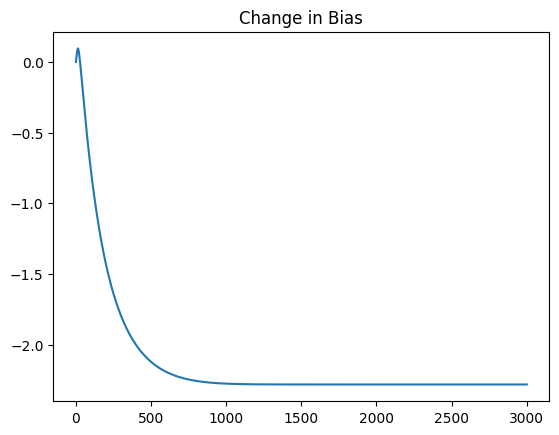

In [ ]:
import matplotlib.pyplot as plt
plt.plot(blist)
plt.title('Change in Bias')

Text(0.5, 1.0, 'MSE')

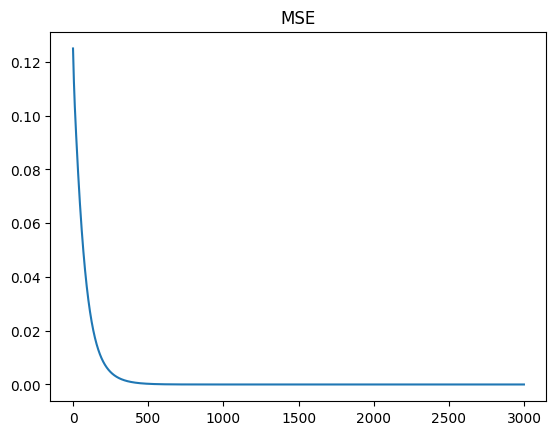

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losslist)
plt.title('MSE')

Text(0.5, 1.0, 'Accuracy')

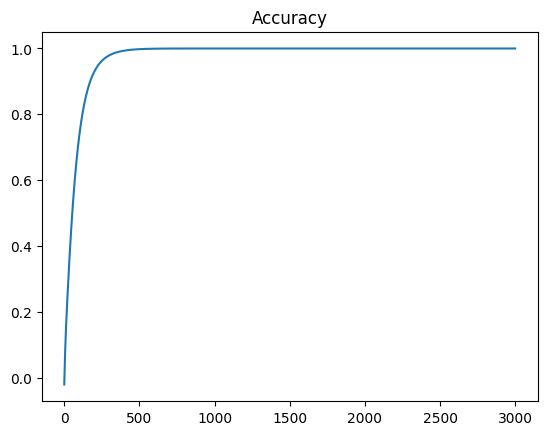

In [ ]:
import matplotlib.pyplot as plt
plt.plot(accuracylist)
plt.title('Accuracy')

Text(0.5, 1.0, 'Bias over loss')

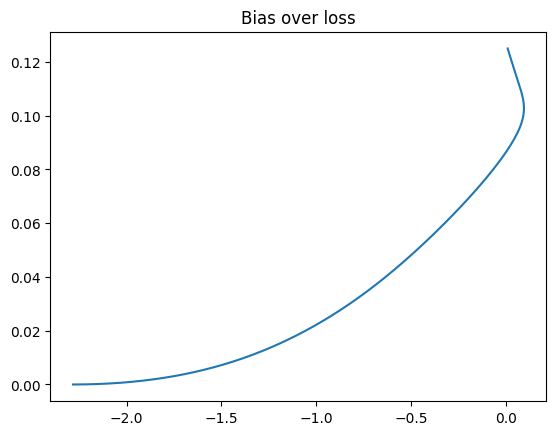

In [ ]:
import matplotlib.pyplot as plt
plt.plot(blist[1:],losslist)
plt.title('Bias over loss')

Text(0.5, 1.0, 'Weight over loss')

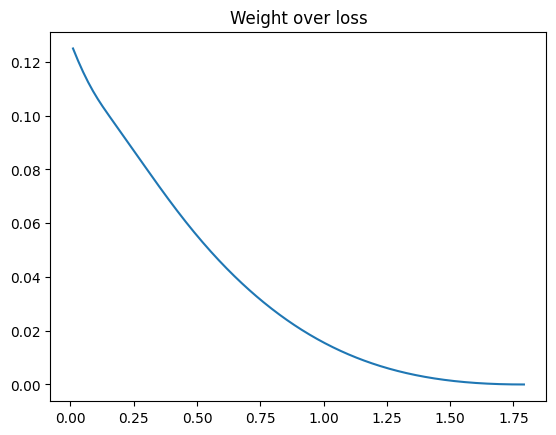

In [ ]:
import matplotlib.pyplot as plt
plt.plot(wlist[1:],losslist)
plt.title('Weight over loss')

6

In [ ]:
"""#XOR Function"""

def step(yin):
  if(yin>=0):
    return 1
  else:
    return 0
def not_func(a):
  if(a==1):
    return 0
  else:
    return 1
def and_func(x):
  w=np.array([1,1])
  b=-2
  yin=np.dot(x,w)+b
  ynet=step(yin)
  return ynet
def or_func(x):
  w=np.array([1,1])
  b=-0.5
  yin=np.dot(x,w)+b
  ynet=step(yin)
  return ynet
def xor_func(x):
  y1=and_func(x)
  y2=or_func(x)
  y3=not_func(y1)
  finx=np.array([y2,y3])
  ynet=and_func(finx)
  return ynet
ans=[]
test1=np.array([0,0])
ans.append(xor_func(test1))

test2=np.array([0,1])
ans.append(xor_func(test2))

test3=np.array([1,0])
ans.append(xor_func(test3))

test4=np.array([1,1])
ans.append(xor_func(test4))

In [ ]:
ans

[0, 1, 1, 0]

7

Text(0.5, 1.0, 'Change in Weight')

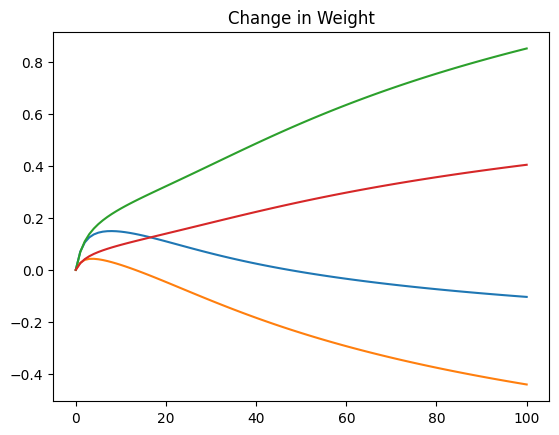

In [ ]:
import numpy as np

from sklearn import datasets

from sklearn.model_selection import train_test_split

def perceptron(x, w, b):
    yin = np.dot(x, w) + b
    ynet = sigmoid(yin)
    return ynet

def sigmoid(yin):
    return 1 / (1 + np.exp(-yin))

def dw(x, y, w, b, alpha):
    yhat = perceptron(x, w, b)
    loss = y - yhat
    dw = alpha * (y - yhat) * yhat * (1 - yhat) * x
    return loss, dw

def db(x, y, w, b, alpha):
    yhat = perceptron(x, w, b)
    db = alpha * (y - yhat) * yhat * (1 - yhat)
    return db

def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

def stoch_with_accuracy(X, Y, w, b, epochs, alpha):
    wlist = [w.copy()]
    blist = [b]
    losslist = []
    accuracylist = []

    for i in range(epochs):
        total_loss = 0
        predictions = []
        for x, y in zip(X, Y):
            loss, wup = dw(x, y, w, b, alpha)
            w += wup
            b += db(x, y, w, b, alpha)
            total_loss += loss ** 2
            predictions.append(np.round(perceptron(x, w, b)))  # Predicted class

        avg_loss = total_loss / len(X)
        acc = accuracy(Y, np.array(predictions))
        losslist.append(avg_loss)
        accuracylist.append(acc)
        wlist.append(w.copy())
        blist.append(b)

    return w, b, wlist, blist, losslist, accuracylist

iris = datasets.load_iris()

X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
w=[0 for i in range(len(X[0]))]
b=0
w,b,wlist,blist,losslist,accuracylist=stoch_with_accuracy(X_train,y_train,w,b,100,0.001)

import matplotlib.pyplot as plt
plt.plot(wlist)
plt.title('Change in Weight')



Text(0.5, 1.0, 'Change in Bias')

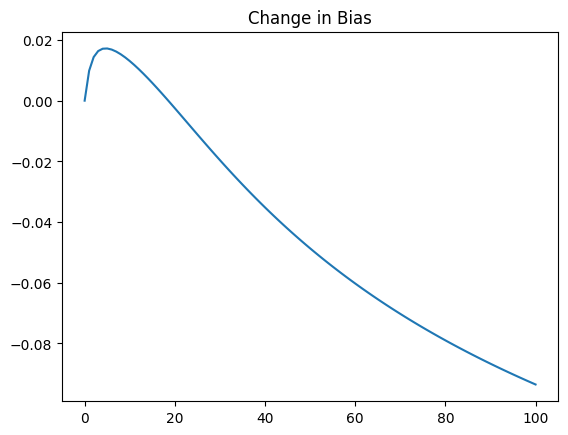

In [ ]:
import matplotlib.pyplot as plt
plt.plot(blist)
plt.title('Change in Bias')

Text(0.5, 1.0, 'MSE')

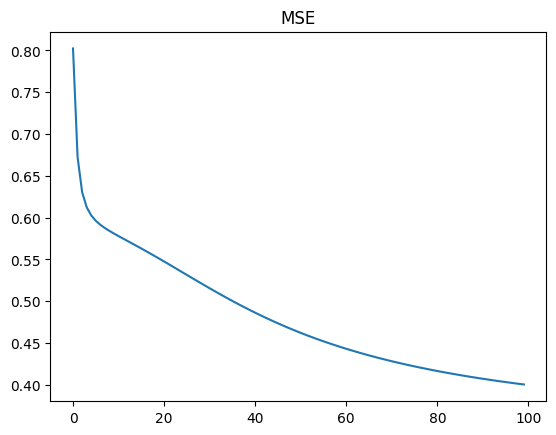

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losslist)
plt.title('MSE')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.48      0.65        31
         2.0       0.00      0.00      0.00         0

    accuracy                           0.68        50
   macro avg       0.67      0.49      0.55        50
weighted avg       1.00      0.68      0.78        50



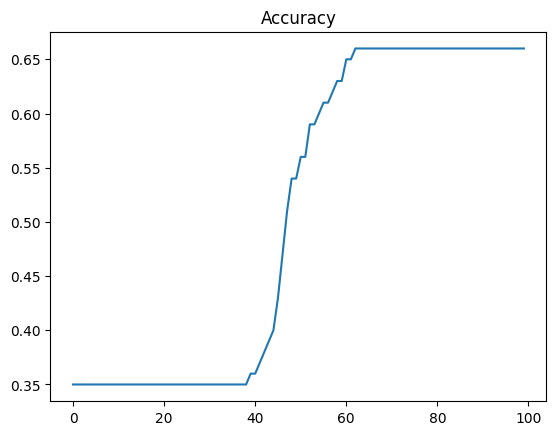

In [ ]:
import matplotlib.pyplot as plt
plt.plot(accuracylist)
plt.title('Accuracy')

predictions=[]
for x in X_test:
  predictions.append(np.round(perceptron(x, w, b)))

from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=b6abf6bb5f53f8ef4d4f7c05437ce67159168d7acbe3fdf3a3f166e64d71429c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   m

1


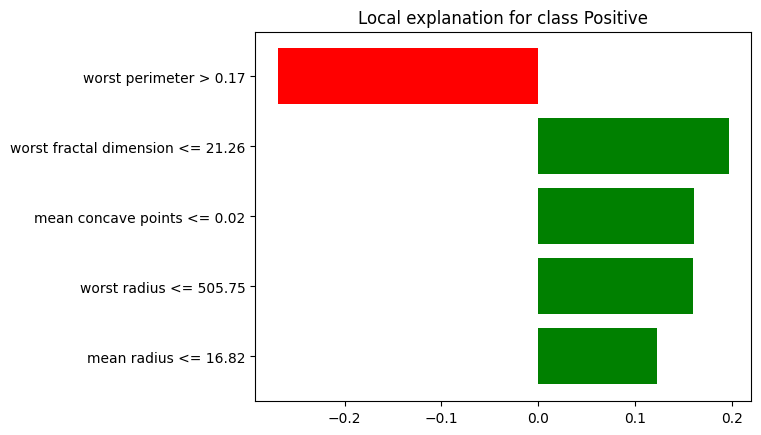

In [ ]:
"""
# EXPLAINABLE AI: LIME ALGORITHM

### Importing Libraries Required
"""

!pip install lime
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import numpy as np
import pandas as pd
np.random.seed(123)

import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings ('ignore')

"""### Importing Data"""

# Loading the data to work with
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

# Information about dataset
df.info()

"""### Training XGBoost"""

# Setting up the data for modelling
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

# Building model - Xgboost
model = XGBClassifier(random_state=42,gpu_id=0) # build classifier Gradient Boosted decision trees
model.fit(X_train,y_train.values.ravel())

# Making prediction
y_pred = model.predict(X_test)

# Performance Measurement
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Classifier Function for lime explaination
predict_fn = lambda x: model.predict_proba(x)

"""### Lime Explainer"""

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.to_numpy(),
                                            feature_names=data.feature_names,
                                            class_names=['Negative','Positive'],
                                            mode='classification',
                                            verbose=True)

"""### Explaining a single data point using lime explainer"""

data_point = 5
exp = explainer.explain_instance(df.loc[data_point,data.feature_names].astype(int).values, predict_fn, num_features=5)
exp.show_in_notebook(show_table=True)

figure = exp.as_pyplot_figure()

print(*exp.available_labels())

